1. Gerekli kütüphaneler

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

2. Veriyi okuma

In [2]:
# Verileri oku
train_df = pd.read_csv("../datasets/pca/train_mental_pca.csv")
test_df = pd.read_csv("../datasets/pca/test_mental_pca.csv")

# Özellik ve hedef ayır
X_train = train_df.drop("treatment", axis=1)
y_train = train_df["treatment"]
X_test = test_df.drop("treatment", axis=1)
y_test = test_df["treatment"]

3. Naive Bayes (GaussianNB)

In [3]:
# Modeli oluştur ve eğit
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

4. Tahmin

In [4]:
# Tahminler
y_pred_nb = model_nb.predict(X_test)
y_proba_nb = model_nb.predict_proba(X_test)[:, 1]

5. Değerlendirme

📋 Sınıflandırma Raporu (Naive Bayes):

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       124
           1       0.78      0.83      0.81       127

    accuracy                           0.80       251
   macro avg       0.80      0.80      0.80       251
weighted avg       0.80      0.80      0.80       251



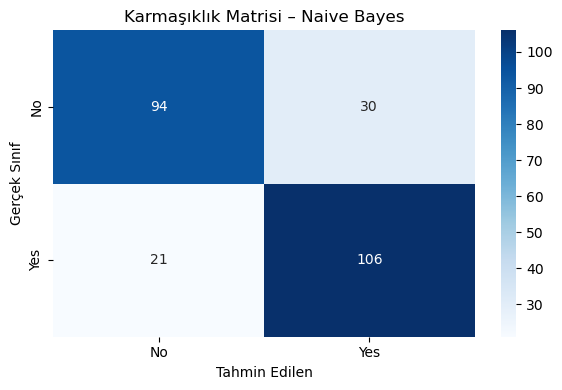

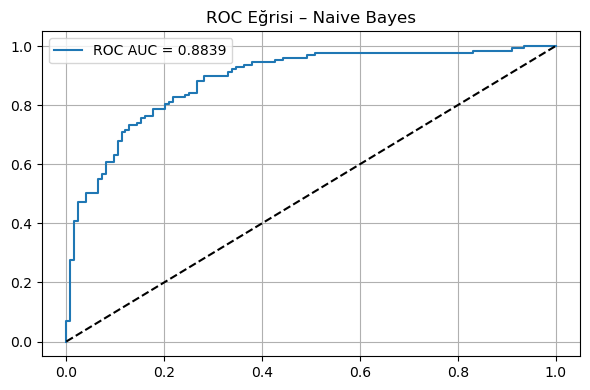

In [5]:
# Rapor
print("📋 Sınıflandırma Raporu (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Naive Bayes")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
roc_auc = roc_auc_score(y_test, y_proba_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Eğrisi – Naive Bayes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()